
The objective of this EDA is to gain a better understanding of the Coursera dataset and identify key trends and patterns.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
dataset_file_path = "/Users/vytautas/Downloads/coursea_data.csv"

coursea_data = pd.read_csv(dataset_file_path)

coursea_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Dropping unnecessary "Unnamed: 0" feature as it adds zero value to the dataset itself.

In [110]:
coursea_data = coursea_data.drop(columns=["Unnamed: 0"])

coursea_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Changing the feature names to lowercase for consistency.

In [111]:
coursea_data.columns = coursea_data.columns.str.lower()

coursea_data.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Checking for missing values.

In [112]:
missing_values_summary = coursea_data.isnull().sum()
if missing_values_summary.sum() == 0:
    print("There are no missing values")
else:
    print("Sumamry of missing values:")
    print(missing_values_summary)

There are no missing values


Checking for duplicate rows, instantly removing them in the if loop.

In [113]:
duplicates_rows = coursea_data.duplicated()

if duplicates_rows.sum() > 0:
    print("Duplicate Rows:")
    print(coursea_data[duplicates_rows])
    coursea_data = coursea_data.drop_duplicates()
else:
    print("There are no duplicate rows in the dataset")

There are no duplicate rows in the dataset


Checking for duplicate columns.

In [114]:
duplicates_columns = coursea_data.T.duplicated()

if duplicates_columns.sum() > 0:
    print("Duplicate Columns")
    print(coursea_data[duplicates_columns])
    coursea_data = coursea_data.T.drop_duplicates().T
else:
    print("There are no duplicate columns in the dataset")

There are no duplicate columns in the dataset


Checking feature types.

In [115]:
coursea_data.dtypes

course_title                 object
course_organization          object
course_certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

Converting categorical features labeled as 'objects' to the categorical data type for improved efficiency.

In [116]:
for col in [
    "course_title",
    "course_organization",
    "course_certificate_type",
    "course_difficulty",
]:
    coursea_data[col] = coursea_data[col].astype("category")

Transforming object-type features to numeric type, while removing abbreviations for thousands ('k') and millions ('m').

In [117]:
def convert_students_enrolled(value):
    if "k" in value:
        return int(float(value.replace("k", "")) * 1000)
    elif "m" in value:
        return int(float(value.replace("m", "")) * 1000000)
    else:
        return int(float(value))


coursea_data["course_students_enrolled"] = coursea_data[
    "course_students_enrolled"
].apply(convert_students_enrolled)

Setting easily accessible numerical/categorical features.

In [118]:
columns_list = coursea_data.columns.tolist()

categorical_features = coursea_data.select_dtypes(include=["category"]).columns.tolist()
numerical_features = coursea_data.select_dtypes(exclude=["category"]).columns.tolist()
print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['course_title', 'course_organization', 'course_certificate_type', 'course_difficulty']
Numerical features: ['course_rating', 'course_students_enrolled']


Time to check the average course ratings, average number of students enrolled, and other descriptive statistics.

In [119]:
coursea_data.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


Examining the distribution of numerical feature, such as course ratings.

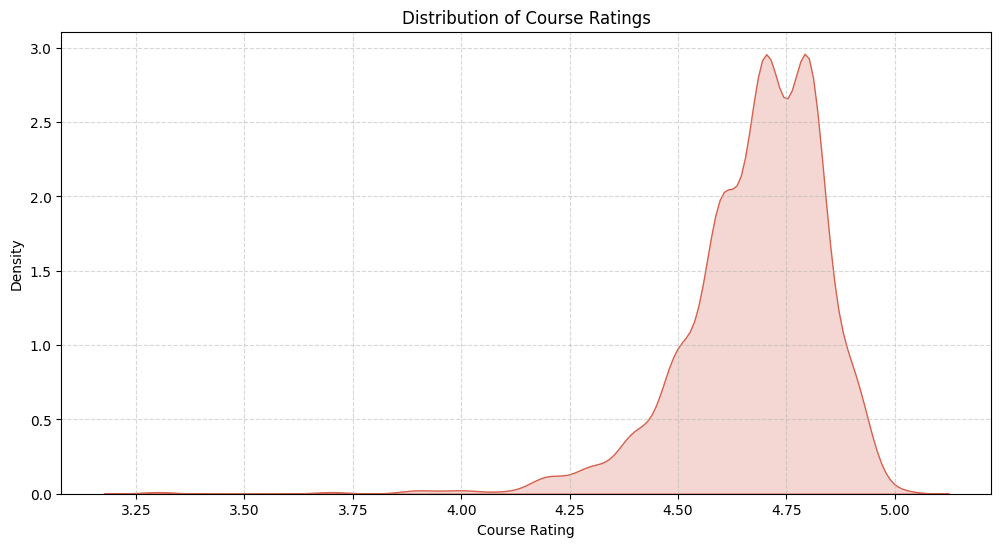

In [120]:
plt.figure(figsize=(12, 6))
sns.set_palette("RdBu", 4)
sns.kdeplot(coursea_data["course_rating"], fill=True)
plt.title("Distribution of Course Ratings")
plt.xlabel("Course Rating")
plt.ylabel("Density")

plt.grid(axis="both", linestyle="--", alpha=0.5)

plt.show()

Examining the distribution of another relevant numerical feature: students enrolled.

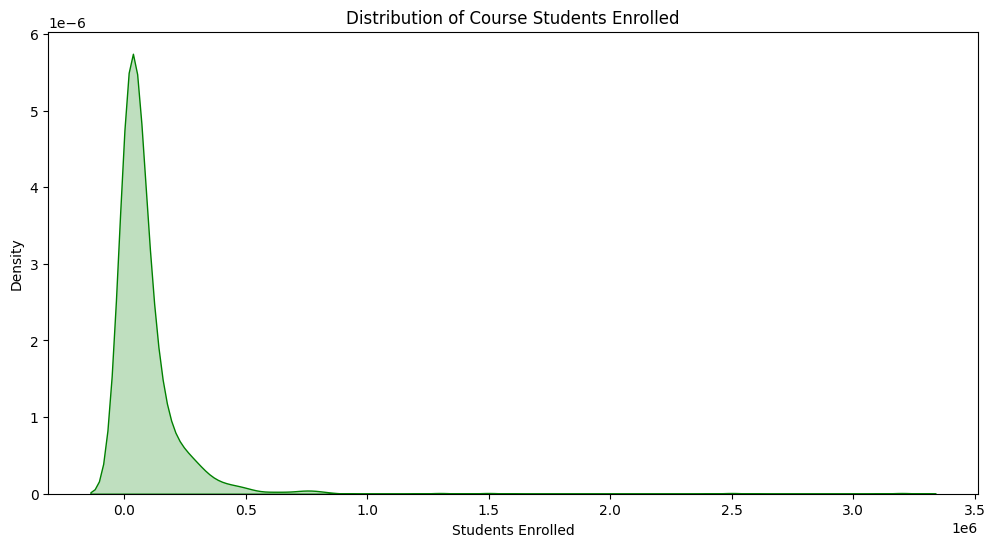

In [121]:
plt.figure(figsize=(12, 6))
sns.kdeplot(coursea_data["course_students_enrolled"], fill=True, color="green")

plt.title("Distribution of Course Students Enrolled")
plt.xlabel("Students Enrolled")
plt.ylabel("Density")

plt.show()

Since both numerical features are skewed, with course rating being negatively skewed (left side tail) and student enrollment being positively skewed (right side tail), the IQR method should be used to find outliers.

In [122]:
def detect_and_print_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    print(f"Potential outliers for {feature}:\n")
    print(outliers)


detect_and_print_outliers_iqr(coursea_data, "course_rating")
detect_and_print_outliers_iqr(coursea_data, "course_students_enrolled")

Potential outliers for course_rating:

                                          course_title  \
59                      Aprende a programar con Python   
182                  Cybersecurity and Its Ten Domains   
331                 Foundations of Marketing Analytics   
402     Hardware Description Languages for FPGA Design   
413  How To Create a Website in a Weekend! (Project...   
414                     How to Start Your Own Business   
445  Instructional Design Foundations and Applications   
515            Introduction to Spreadsheets and Models   
522    Introduction to Trading, Machine Learning & GCP   
566  Machine Learning and Reinforcement Learning in...   
569                       Machine Learning for Trading   
590                   Mastering Data Analysis in Excel   
598              Mathematics for Machine Learning: PCA   
640                                Optical Engineering   
676                                  Project Execution   
844              Unity XR: How to

Checking for outliers through visualization in the course_rating feature, and marking any data points outside the whiskers of the box plot as outliers.

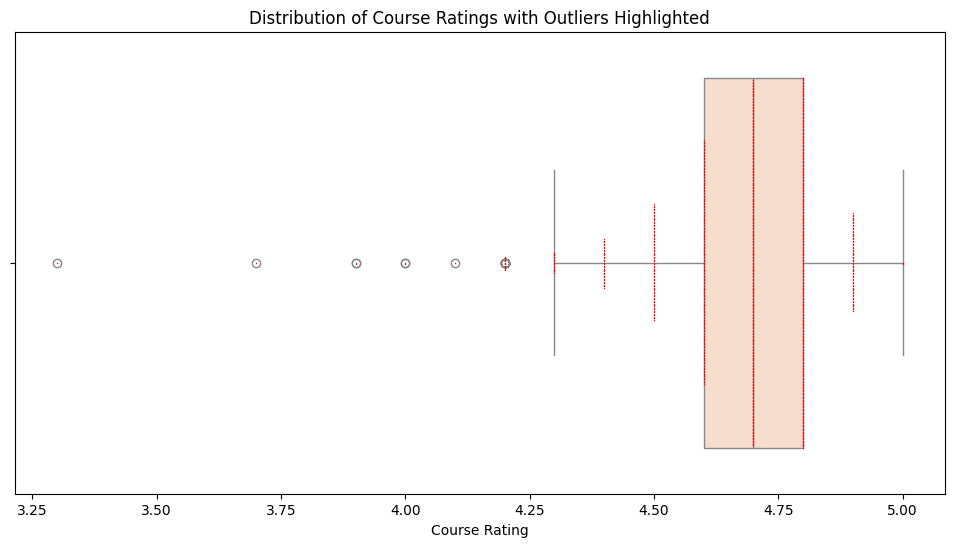

In [123]:
plt.figure(figsize=(12, 6))
sns.set_palette("RdBu", 4)

sns.boxplot(x="course_rating", data=coursea_data, color=sns.color_palette("RdBu", 4)[1])

plt.xlabel("Course Rating")
plt.ylabel("")

plt.title("Distribution of Course Ratings with Outliers Highlighted")

sns.swarmplot(x="course_rating", data=coursea_data, color="red", size=1)

plt.show()

Checking for outliers through visualization in the course_students_enrolled feature, and marking any data points outside the whiskers of the box plot as outliers.

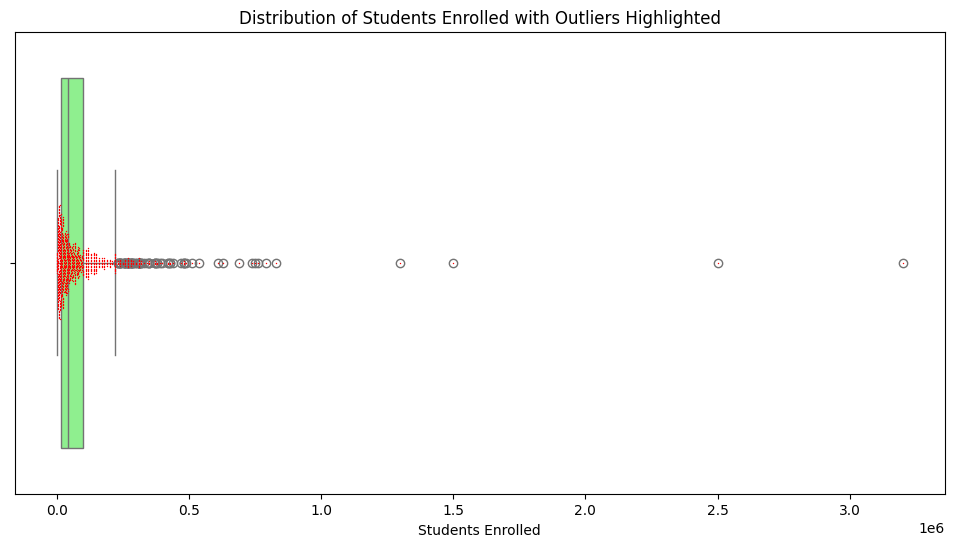

In [124]:
lighter_green = "#7fff7f"

plt.figure(figsize=(12, 6))

sns.boxplot(x="course_students_enrolled", data=coursea_data, color=lighter_green)

plt.xlabel("Students Enrolled")
plt.ylabel("")

plt.title("Distribution of Students Enrolled with Outliers Highlighted")

sns.swarmplot(x="course_students_enrolled", data=coursea_data, color="red", size=1)

plt.show()

Given that both the course_rating and course_students_enrolled features are skewed (course_rating to the left and course_students_enrolled to the right), it is even more important not to treat potential outliers as errors. 

The skewed distribution indicates that the ratings and enrollment numbers vary naturally, and these extremes likely represent valid and meaningful data points. 

Adjusting or removing them could distort the true characteristics of the dataset and compromise the accuracy of our analysis. 

Embracing the existing skewness ensures that we accurately represent the diverse educational landscape captured in the dataset.

That said, let's check the correlation between course rating and students enrolled.

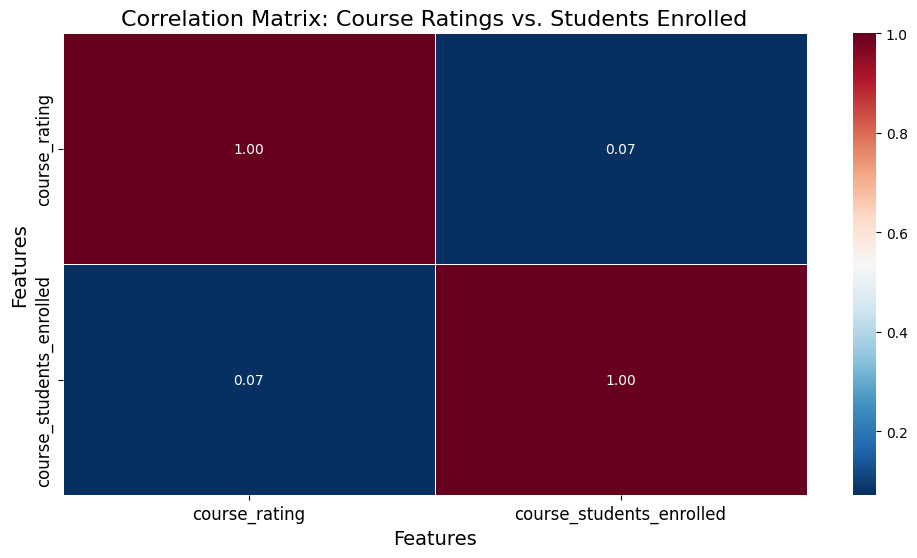

In [125]:
correlation_matrix = coursea_data[["course_rating", "course_students_enrolled"]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    correlation_matrix, annot=True, cmap="RdBu_r", fmt=".2f", linewidths=0.5, cbar=True
)

plt.title("Correlation Matrix: Course Ratings vs. Students Enrolled", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Although there is a weak positive correlation between course ratings and the number of students enrolled, it is not strong enough to conclude that course ratings cause an increase in student enrollment.

That being said, correlation does not imply causation. 

Even if there is a correlation, it does not necessarily mean that higher ratings directly cause more students to enroll or vice versa.

Having said that, we need to know the course with the most enrollments and its rating, as well as the course with the fewest enrollments and its rating.

In [126]:
max_enrollments_course_index = coursea_data["course_students_enrolled"].idxmax()
max_enrollments_course = coursea_data.iloc[max_enrollments_course_index]
max_enrollments_course_title = max_enrollments_course["course_title"]
max_enrollments_course_rating = max_enrollments_course["course_rating"]
max_enrollments_students_enrolled = max_enrollments_course["course_students_enrolled"]

print(
    f"The course with the most enrollments is '{max_enrollments_course_title}' with a rating of {max_enrollments_course_rating} and {max_enrollments_students_enrolled} students enrolled."
)

The course with the most enrollments is 'Machine Learning' with a rating of 4.9 and 3200000 students enrolled.


The fact that Machine Learning is the course with the most enrollments, with 3.2 million enrollments and a high rating of 4.9, suggests that it is a popular and well-regarded course.

This could be due to a number of factors, such as the high demand for machine learning skills in the job market, the quality of the course content, or the reputation of the instructor.

In [127]:
min_enrollments_course_index = coursea_data["course_students_enrolled"].idxmin()
min_enrollments_course = coursea_data.iloc[min_enrollments_course_index]
min_enrollments_course_title = min_enrollments_course["course_title"]
min_enrollments_course_rating = min_enrollments_course["course_rating"]
min_enrollments_students_enrolled = min_enrollments_course["course_students_enrolled"]

print(
    f"The course with the fewest enrollments is '{min_enrollments_course_title}' with a rating of {min_enrollments_course_rating} and {min_enrollments_students_enrolled} students enrolled."
)

The course with the fewest enrollments is 'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho' with a rating of 5.0 and 1500 students enrolled.


El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho is a niche course in Spanish with 1500 students enrolled. It is a new course, so it may not be well-known. However, it is highly rated by its students, suggesting that it is a high-quality course on a specialized topic.

That being said, it is time to check what are the most common course titles in the dataset?

In [128]:
course_title_counts = coursea_data["course_title"].value_counts()

most_common_titles = course_title_counts.head()

print(f"Most Common Course Titles: {most_common_titles}")

Most Common Course Titles: course_title
Developing Your Musicianship                             2
Marketing Digital                                        2
Machine Learning                                         2
(ISC)² Systems Security Certified Practitioner (SSCP)    1
Medical Neuroscience                                     1
Name: count, dtype: int64


We have multiple course titles with the same name. We previously checked for duplicate rows, but it is possible that some features are different. We should inspect the data to see if this is the case.

In [129]:
duplicate_titles = coursea_data[coursea_data.duplicated("course_title", keep=False)]

print("Duplicate Course Titles:\n", duplicate_titles["course_title"])

Duplicate Course Titles:
 224    Developing Your Musicianship
225    Developing Your Musicianship
563                Machine Learning
564                Machine Learning
582               Marketing Digital
583               Marketing Digital
Name: course_title, dtype: category
Categories (888, object): ['(ISC)² Systems Security Certified Practitione..., 'A Crash Course in Causality:  Inferring Causa..., 'A Crash Course in Data Science', 'A Law Student's Toolkit', ..., 'Психолингвистика (Psycholinguistics)', 'Разработка интерфейсов: вёрстка и JavaScript', 'Русский как иностранный', 'Финансовые инструменты для частного инвестора']


To inspect further, we will check the exact rows that contain the duplicate course titles.

In [130]:
rows_to_inspect = [224, 225, 563, 564, 582, 583]
print(coursea_data.iloc[rows_to_inspect])

                     course_title        course_organization  \
224  Developing Your Musicianship   Berklee College of Music   
225  Developing Your Musicianship   Berklee College of Music   
563              Machine Learning   University of Washington   
564              Machine Learning        Stanford University   
582             Marketing Digital  Universidade de São Paulo   
583             Marketing Digital        Universidad Austral   

    course_certificate_type  course_rating course_difficulty  \
224                  COURSE            4.8             Mixed   
225          SPECIALIZATION            4.8          Beginner   
563          SPECIALIZATION            4.6      Intermediate   
564                  COURSE            4.9             Mixed   
582                  COURSE            4.8          Beginner   
583          SPECIALIZATION            4.7          Beginner   

     course_students_enrolled  
224                     41000  
225                     54000  
563   

Rows that are provided here are not true duplicates. They have the same course title and organization, but different certificate types, ratings, difficulties, and student enrollments. 

This suggests that they are different courses, even though they have the same name.

That being said, it would be the time to check for organizations with most courses.

In [131]:
organization_counts = coursea_data["course_organization"].value_counts()

most_courses_organizations = organization_counts.head(10)

print(f"Organizations with most courses: \n{most_courses_organizations}")

Organizations with most courses: 
course_organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Duke University                               28
Johns Hopkins University                      28
University of California, Irvine              27
University of Illinois at Urbana-Champaign    22
IBM                                           22
University of California, Davis               21
University of Colorado Boulder                19
Name: count, dtype: int64


Time to visually check how dominant these organizations are in terms of courses provided per organization.

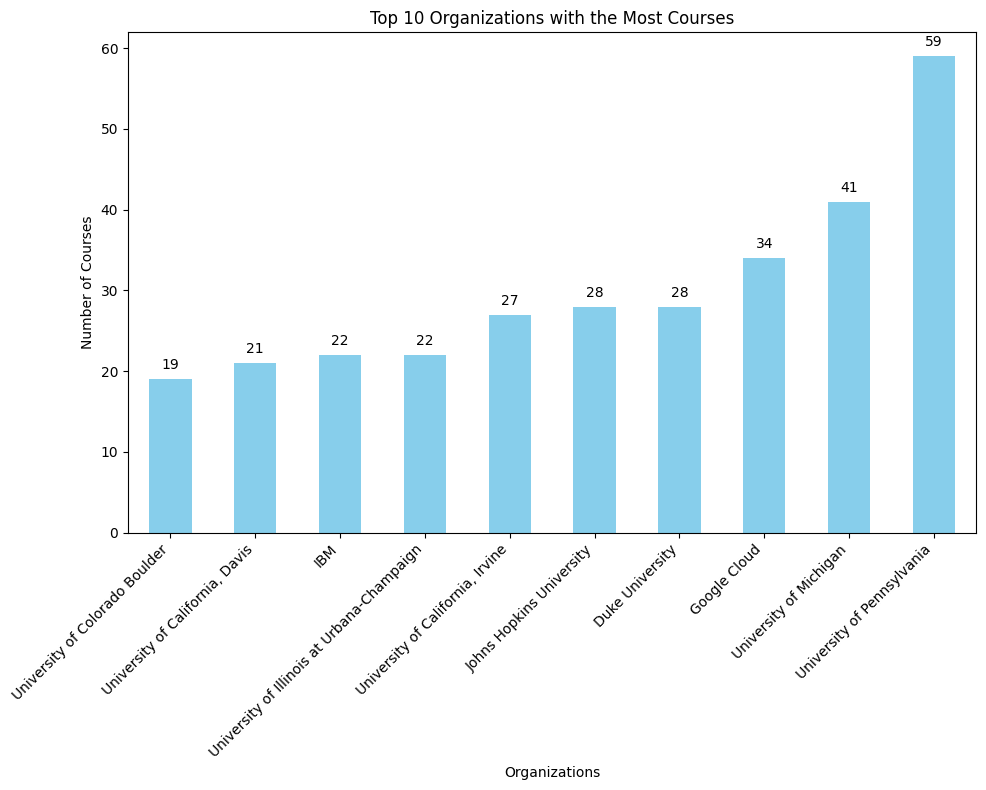

In [132]:
most_courses_organizations = organization_counts.sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 8))
ax = most_courses_organizations.plot(kind="bar", color="skyblue")
plt.title("Top 10 Organizations with the Most Courses")
plt.xlabel("Organizations")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for value in ax.patches:
    ax.annotate(
        f"{value.get_height()}",
        (value.get_x() + value.get_width() / 2.0, value.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

plt.show()

With this in note, we should be checking what type of certificate types are offered by courses.

In [133]:
certificate_types = coursea_data["course_certificate_type"].unique()

print("Available certificate types:")
for cert in certificate_types:
    print(f"- {cert}")

Available certificate types:
- SPECIALIZATION
- COURSE
- PROFESSIONAL CERTIFICATE


Now that we have the certificate types, let's check which of them are dominant.

In [134]:
course_certificate_type_counts = coursea_data["course_certificate_type"].value_counts()

print(f"Number of certificates of each type:\n{course_certificate_type_counts}")

Number of certificates of each type:
course_certificate_type
COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: count, dtype: int64


Time to visualize this

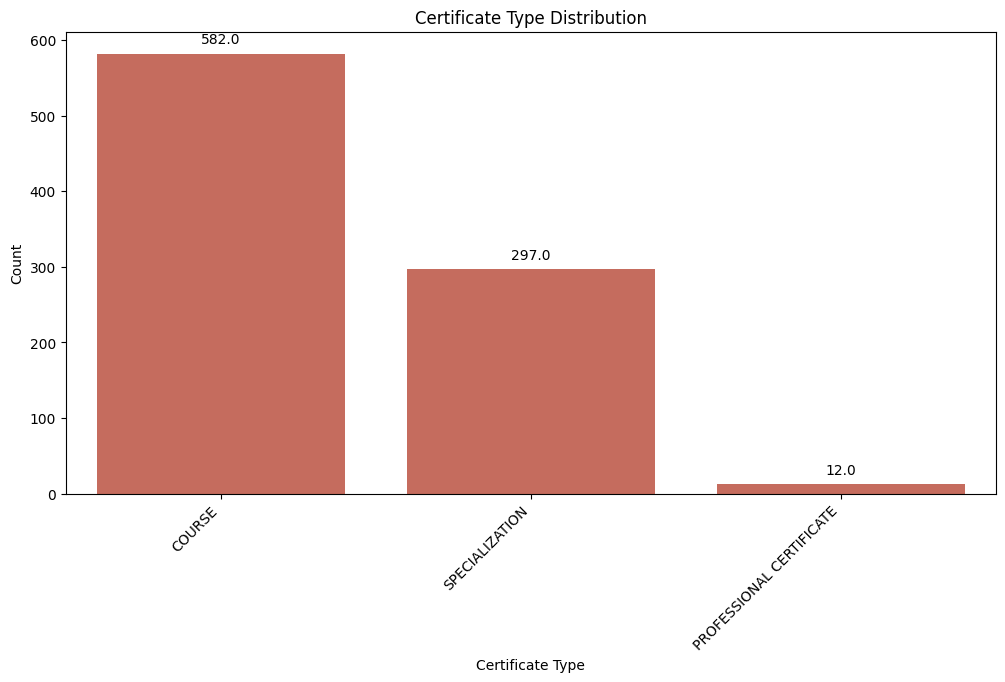

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x="course_certificate_type",
    data=coursea_data,
    order=course_certificate_type_counts.index,
)
plt.title("Certificate Type Distribution")
plt.xlabel("Certificate Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

for value in ax.patches:
    ax.annotate(
        f"{value.get_height()}",
        (value.get_x() + value.get_width() / 2.0, value.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.show()

We can say that the most dominant certificate type on Coursera is the COURSE certificate, followed by the SPECIALIZATION certificate. The PROFESSIONAL CERTIFICATE certificate is the least dominant certificate type.

This suggests that Coursera learners are most interested in earning certificates that demonstrate their mastery of specific courses or skills. It also suggests that Coursera's SPECIALIZATION certificates are well-regarded by learners, as they are more challenging to earn than COURSE certificates.

One possible explanation for the low dominance of PROFESSIONAL CERTIFICATE certificates is that they are relatively new. It is possible that these certificates will become more popular over time as learners become more aware of them and as Coursera offers more PROFESSIONAL CERTIFICATE programs.

Another possible explanation is that PROFESSIONAL CERTIFICATE certificates are more expensive than COURSE certificates and SPECIALIZATION certificates. This may make them less accessible to some learners.

Overall, the results you provided suggest that Coursera learners are most interested in earning certificates that demonstrate their mastery of specific courses or skills. They are also interested in earning SPECIALIZATION certificates, which are more challenging to earn than COURSE certificates. PROFESSIONAL CERTIFICATE certificates are less dominant, possibly because they are new and more expensive or more time consuming.

That being said, let's check the distribution of the course difficulties.

In [136]:
difficulty_distribution = coursea_data["course_difficulty"].value_counts()
print("Course Difficulty Level distribution: ")
print(difficulty_distribution)

Course Difficulty Level distribution: 
course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64


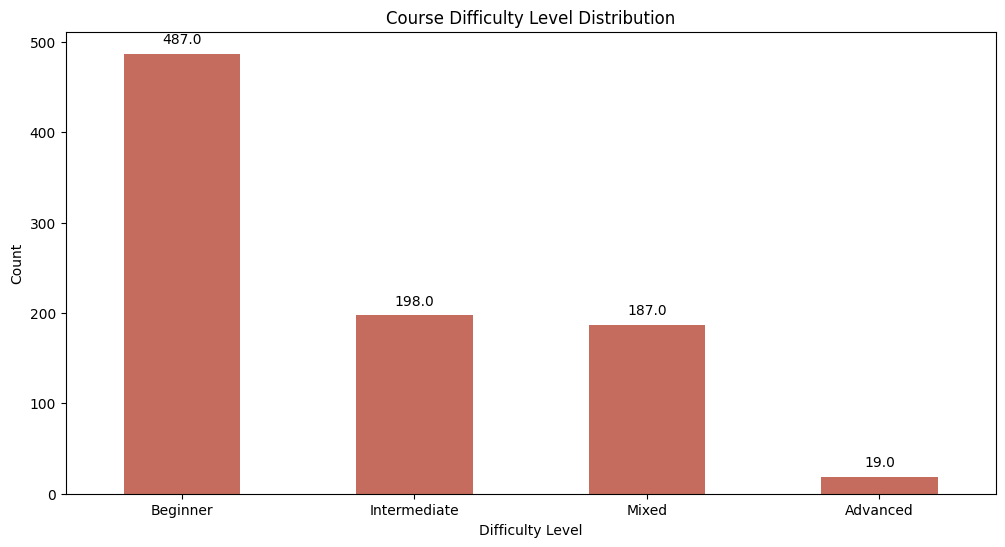

In [146]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    x="course_difficulty",
    data=coursea_data,
    order=difficulty_distribution.index,
    width= 0.5
)
plt.title("Course Difficulty Level Distribution")
plt.xlabel("Difficulty Level")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )


plt.show()

Some conclusion we can make about the difficulty distribution:

- We can see that the majority of courses on Coursera are at the beginner or intermediate level.

- There are a significant number of courses at the mixed level, which indicates that they cover a range of difficulty levels.

- A small number of courses are at the advanced level.

This distribution suggests that Coursera is a platform for students of all levels, from beginners to advanced learners. It also suggests that there is a wide 

variety of courses available to choose from, so students can find courses that meet their individual needs and interests.

That being said, it is time to check how do course ratings vary across different difficulty levels

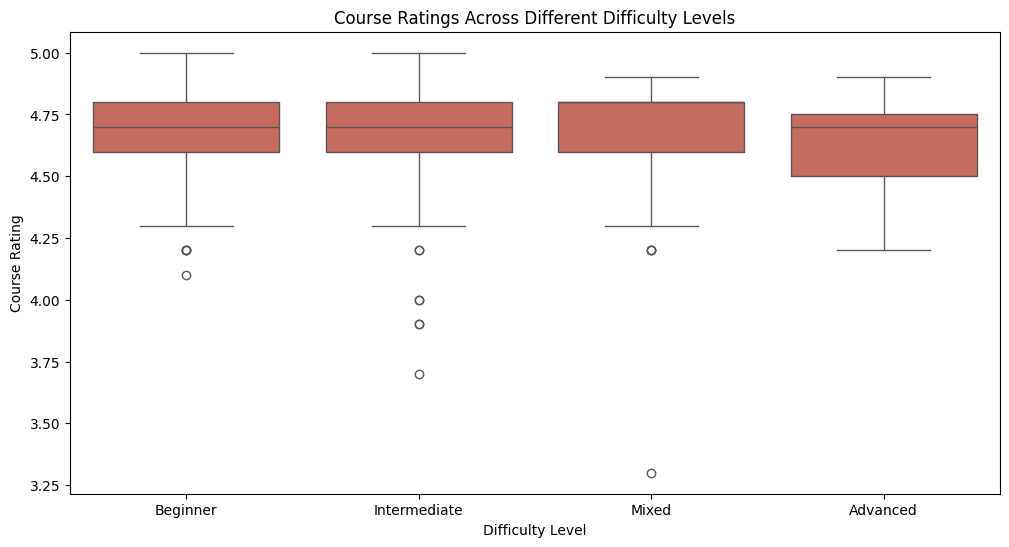

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="course_difficulty",
    y="course_rating",
    data=coursea_data,
    order=difficulty_distribution.index,
)
plt.title("Course Ratings Across Different Difficulty Levels")
plt.xlabel("Difficulty Level")
plt.ylabel("Course Rating")
plt.show()

We can see that some easier difficulty courses have higher ratings concentration, as well as some of the outliers. However, advanced courses generally have lower ratings. This may be due to factors such as highly qualified people having high expectations, or the low number of such courses.

That being said, we can use some quantitative Insights:

Use statistical measures (e.g., median, mean)  to summarize the enrollments for each organization.

Will use the mean method, even though the median is better for skewed data, because university data should not be treated as skewed, as there are way better organizations than others.

That being said, the mean is a better measure of central tendency for data with a wide range of values, such as university enrollments.

Identify organizations with consistently high enrollments.

In [139]:
organization_mean_enrollments = coursea_data.groupby("course_organization")[
    "course_students_enrolled"
].mean()
print("Top 10 Organizations by Mean Enrollments:")
top_10_organizations = organization_mean_enrollments.nlargest(10)
print(top_10_organizations)

Top 10 Organizations by Mean Enrollments:
course_organization
Stanford University                             303375.000000
Yale University                                 232470.588235
McMaster University                             230000.000000
Google - Spectrum Sharing                       210000.000000
Ludwig-Maximilians-Universität München (LMU)    192500.000000
École Polytechnique                             190000.000000
University of Michigan                          181407.317073
Georgia Institute of Technology                 181300.000000
deeplearning.ai                                 178962.500000
University of Washington                        167400.000000
Name: course_students_enrolled, dtype: float64


/var/folders/lg/8f6nv9qx2fs6kx2fh627mhy00000gn/T/ipykernel_8228/334024693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organization_mean_enrollments = coursea_data.groupby("course_organization")[


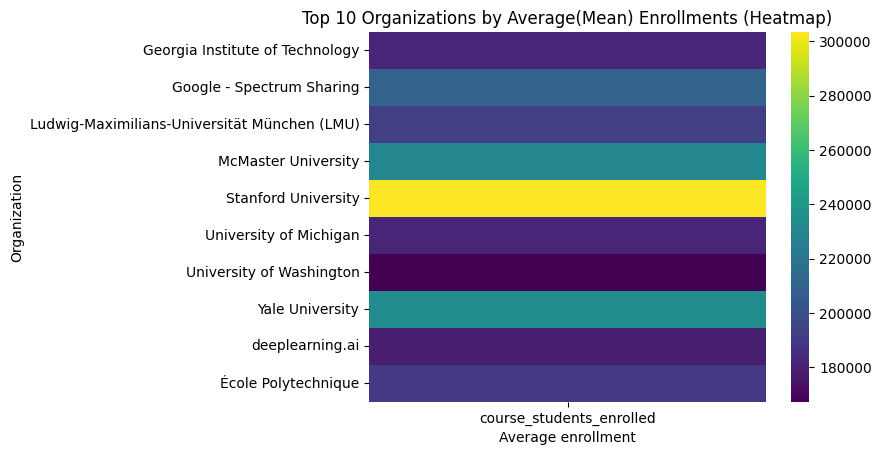

In [140]:
filtered_data = organization_mean_enrollments[
    organization_mean_enrollments.index.isin(top_10_organizations.index)
]
filtered_data = filtered_data.to_frame()

sns.heatmap(filtered_data, cmap="viridis")
plt.xlabel("Average enrollment")
plt.ylabel("Organization")
plt.title("Top 10 Organizations by Average(Mean) Enrollments (Heatmap)")
plt.show()

We can create then, a contingency table that shows the distribution of course difficulty levels by course certificate type.

In [141]:
cross_table = pd.crosstab(
    coursea_data["course_certificate_type"], coursea_data["course_difficulty"]
)
print(cross_table)

course_difficulty         Advanced  Beginner  Intermediate  Mixed
course_certificate_type                                          
COURSE                           9       282           104    187
PROFESSIONAL CERTIFICATE         0         9             3      0
SPECIALIZATION                  10       196            91      0


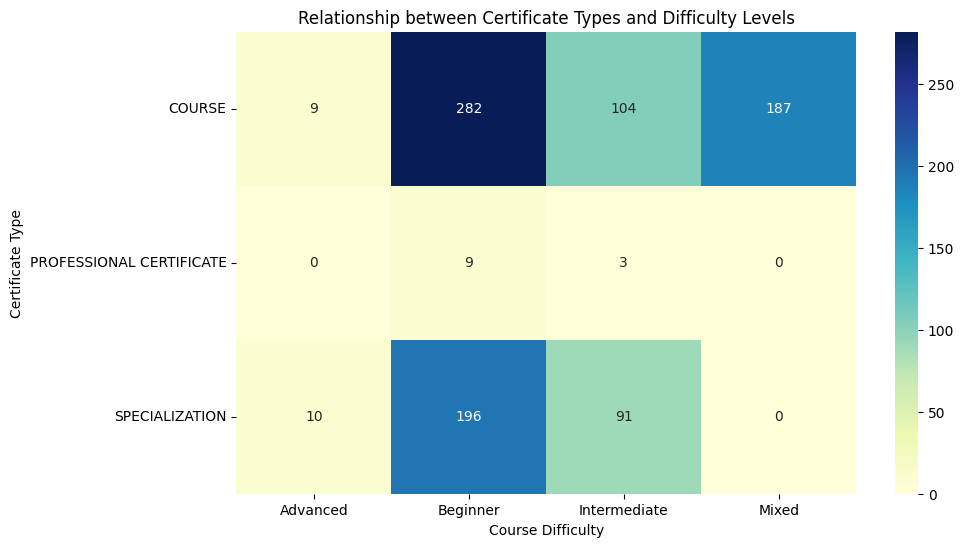

In [142]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap="YlGnBu", fmt="d", cbar=True)
plt.title("Relationship between Certificate Types and Difficulty Levels")
plt.xlabel("Course Difficulty")
plt.ylabel("Certificate Type")
plt.show()

We can see that "COURSE" certificates are more common for Beginner difficulty.

"PROFESSIONAL CERTIFICATE" certificates are exclusively associated with Beginner difficulty.

"SPECIALIZATION" certificates are distributed across Beginner, Intermediate, and Advanced difficulty levels.

Shows the distribution of course difficulty levels (Advanced, Beginner, Intermediate, Mixed) across various certificate types (COURSE, PROFESSIONAL CERTIFICATE, SPECIALIZATION). Most certificates are at the Beginner level, with significant representation in both COURSE and PROFESSIONAL CERTIFICATE categories. Intermediate difficulty is also prevalent, particularly in COURSE and PROFESSIONAL CERTIFICATE types. Advanced difficulty is observed primarily in COURSE certificates, and the "Mixed" difficulty level is exclusively associated with COURSE certificates. Notably, PROFESSIONAL CERTIFICATE certificates are not offered at the Advanced difficulty level, and SPECIALIZATION certificates do not include a Mixed difficulty category. Further analysis could help us to understand the underlying reasons for these patterns and make informed decisions about course offerings and difficulty levels.


Shows the distribution of course difficulty levels (Advanced, Beginner, Intermediate, Mixed) across various certificate types (COURSE, PROFESSIONAL CERTIFICATE, SPECIALIZATION). 

Most certificates are at the Beginner level, with significant representation in both COURSE and PROFESSIONAL CERTIFICATE categories. 

Intermediate difficulty is also prevalent, particularly in COURSE and PROFESSIONAL CERTIFICATE types. Advanced difficulty is observed primarily in COURSE certificates, and the "Mixed" difficulty level is exclusively associated with COURSE certificates. 

Notably, PROFESSIONAL CERTIFICATE certificates are not offered at the Advanced difficulty level, and SPECIALIZATION certificates do not include a Mixed difficulty category. 

Further analysis could help us to understand the underlying reasons for these patterns and make informed decisions about course offerings and difficulty levels.



### Summary of EDA

This analysis examined the distribution of Coursera courses across certificate types, difficulty levels, and organizations. 

The most common certificate type was COURSE, followed by SPECIALIZATION and PROFESSIONAL CERTIFICATE. 

The majority of courses were at the beginner or intermediate level, with fewer courses at the advanced level. 

The most common course organizations were universities, followed by technology companies and other non-profit organizations.

Further analysis revealed that SPECIALIZATION certificates were more challenging than COURSE or PROFESSIONAL CERTIFICATE certificates, and that ADVANCED difficulty courses were more likely to be COURSE certificates than SPECIALIZATION certificates. 

The analysis also showed that there was a correlation between course difficulty and ratings, with easier courses tending to have higher ratings.

These findings suggest that Coursera offers a diverse range of courses for learners of all skill levels and interests. 

SPECIALIZATION certificates are a good option for learners who want to gain a comprehensive understanding of a particular topic, while PROFESSIONAL CERTIFICATE certificates are a good option for learners who want to develop specific skills for the job market.

### Improvements

- Means can be transformed for more readability.
- Top 10 Organizations by Average(Mean) Enrollments (Heatmap) chart could be improved.

